<a href="https://colab.research.google.com/github/pk18singh/Flat_Prediction_Model/blob/main/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 81,0.89,8128.0,1.0,1.0,0,1.0,Relatively New,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,flat,central park flower valley,sector 33,1.35,10385.0,3.0,2.0,2,3.0,New Property,1444.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0
2,flat,guru gram haryana cghs,sector 56,1.39,8424.0,3.0,2.0,3,6.0,Old Property,1750.0,0.0,1.0,0.0,1.0,0.0,2.0,89.0
3,flat,emaar mgf emerald floors premier,sector 65,3.00,15190.0,4.0,4.0,3+,2.0,Relatively New,1975.0,0.0,1.0,0.0,0.0,0.0,0.0,87.0
4,house,independent,manesar,2.00,14959.0,3.0,1.0,0,3.0,Moderately Old,1337.4,0.0,0.0,0.0,0.0,0.0,0.0,16.0


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,sector 81,0.89,1.0,1.0,0,1.0,Relatively New,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,flat,sector 33,1.35,3.0,2.0,2,3.0,New Property,1444.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0
2,flat,sector 56,1.39,3.0,2.0,3,6.0,Old Property,1750.0,0.0,1.0,0.0,1.0,0.0,2.0,89.0
3,flat,sector 65,3.00,4.0,4.0,3+,2.0,Relatively New,1975.0,0.0,1.0,0.0,0.0,0.0,0.0,87.0
4,house,manesar,2.00,3.0,1.0,0,3.0,Moderately Old,1337.4,0.0,0.0,0.0,0.0,0.0,0.0,16.0


<ipython-input-8-fea0e4f92c30>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr())


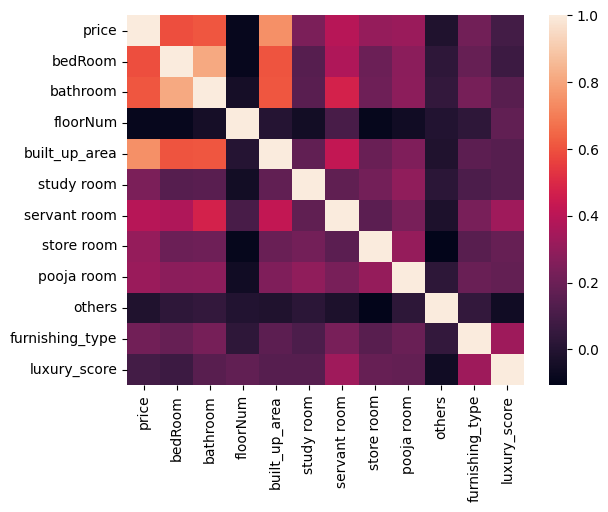

In [8]:
sns.heatmap(train_df.corr())
plt.show()

In [9]:
train_df.corr()['price'].sort_values(ascending=False)

<ipython-input-9-8f32b8306ca3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()['price'].sort_values(ascending=False)


price              1.000000
built_up_area      0.748574
bathroom           0.609777
bedRoom            0.591289
servant room       0.391930
pooja room         0.319852
store room         0.305677
study room         0.242955
furnishing_type    0.214581
luxury_score       0.091473
others            -0.013064
floorNum          -0.087442
Name: price, dtype: float64

In [10]:
df.shape

(3554, 18)

**Luxury score**

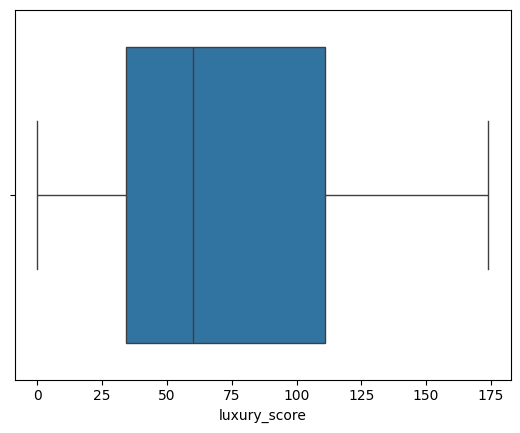

In [11]:
sns.boxplot(x=df['luxury_score'])
plt.show()

In [12]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [13]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [14]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,house,sector 81,0.89,1.0,1.0,0,1.0,Relatively New,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,flat,sector 33,1.35,3.0,2.0,2,3.0,New Property,1444.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,Medium
2,flat,sector 56,1.39,3.0,2.0,3,6.0,Old Property,1750.0,0.0,1.0,0.0,1.0,0.0,2.0,89.0,Medium
3,flat,sector 65,3.00,4.0,4.0,3+,2.0,Relatively New,1975.0,0.0,1.0,0.0,0.0,0.0,0.0,87.0,Medium
4,house,manesar,2.00,3.0,1.0,0,3.0,Moderately Old,1337.4,0.0,0.0,0.0,0.0,0.0,0.0,16.0,Low


**FloorNum**

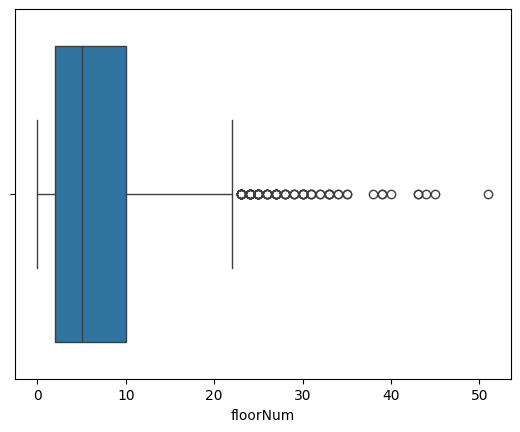

In [15]:
sns.boxplot(x=df['floorNum'])
plt.show()


In [16]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [17]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [18]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,house,sector 81,0.89,1.0,1.0,0,1.0,Relatively New,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
1,flat,sector 33,1.35,3.0,2.0,2,3.0,New Property,1444.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,Medium,Mid Floor
2,flat,sector 56,1.39,3.0,2.0,3,6.0,Old Property,1750.0,0.0,1.0,0.0,1.0,0.0,2.0,89.0,Medium,Mid Floor
3,flat,sector 65,3.00,4.0,4.0,3+,2.0,Relatively New,1975.0,0.0,1.0,0.0,0.0,0.0,0.0,87.0,Medium,Low Floor
4,house,manesar,2.00,3.0,1.0,0,3.0,Moderately Old,1337.4,0.0,0.0,0.0,0.0,0.0,0.0,16.0,Low,Mid Floor


In [19]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [20]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,house,sector 81,0.89,1.0,1.0,0,Relatively New,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
1,flat,sector 33,1.35,3.0,2.0,2,New Property,1444.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Mid Floor
2,flat,sector 56,1.39,3.0,2.0,3,Old Property,1750.0,0.0,1.0,0.0,1.0,0.0,2.0,Medium,Mid Floor
3,flat,sector 65,3.00,4.0,4.0,3+,Relatively New,1975.0,0.0,1.0,0.0,0.0,0.0,0.0,Medium,Low Floor
4,house,manesar,2.00,3.0,1.0,0,Moderately Old,1337.4,0.0,0.0,0.0,0.0,0.0,0.0,Low,Mid Floor


In [21]:
from sklearn.preprocessing import OrdinalEncoder


# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols =  train_df.select_dtypes(include = ['object']).columns

for col in categorical_cols:

  oe = OrdinalEncoder()
  data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
  print(oe.categories_)

X_label = data_label_encoded.drop('price', axis = 1)
Y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [22]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,92.0,1.0,1.0,0.0,3.0,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,39.0,3.0,2.0,2.0,1.0,1444.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
2,0.0,63.0,3.0,2.0,3.0,2.0,1750.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,2.0
3,0.0,73.0,4.0,4.0,4.0,3.0,1975.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
4,1.0,2.0,3.0,1.0,0.0,0.0,1337.4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,111.0,2.0,2.0,3.0,1.0,913.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,1.0,55.0,3.0,3.0,1.0,2.0,1386.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0
3551,0.0,71.0,4.0,4.0,4.0,1.0,3950.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3552,1.0,79.0,10.0,5.0,3.0,2.0,2700.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [23]:
Y_label

0       0.89
1       1.35
2       1.39
3       3.00
4       2.00
        ... 
3549    0.56
3550    2.75
3551    7.90
3552    2.40
3553    1.95
Name: price, Length: 3554, dtype: float64

**Technique 1 - Correlation Analysis**

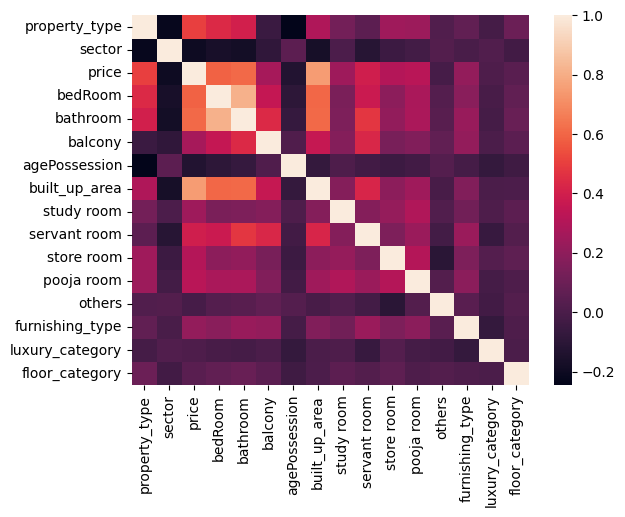

In [24]:
sns.heatmap(data_label_encoded.corr())
plt.show()

In [25]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'}).sort_values(by = 'corr_coeff', ascending = False)

In [26]:
fi_df1

,feature,corr_coeff
1,price,1.000000
6,built_up_area,0.748574
3,bathroom,0.609777
2,bedRoom,0.591289
8,servant room,0.391930
10,pooja room,0.319852
9,store room,0.305677
4,balcony,0.269637
7,study room,0.242955
12,furnishing_type,0.214581


**Technique 2 - Random Forest Feature Importance**

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_label = RandomForestRegressor(n_estimators = 100, random_state=42)
rf_label.fit(X_label, Y_label)

fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance' : rf_label.feature_importances_
}).sort_values(by = 'rf_importance', ascending = False)


In [28]:
fi_df2

,feature,rf_importance
6,built_up_area,0.648571
0,property_type,0.104580
1,sector,0.103772
2,bedRoom,0.025252
3,bathroom,0.024639
8,servant room,0.018943
5,agePossession,0.015316
4,balcony,0.012898
7,study room,0.008456
9,store room,0.007713


**Technique 3 - Gradient Boosting Feature importances**

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, Y_label)


fi_df3 = pd.DataFrame({
    'feature' : X_label.columns,
    'gb_importance' : gb_label.feature_importances_
}).sort_values(by = 'gb_importance', ascending=False)

In [30]:
fi_df3

,feature,gb_importance
6,built_up_area,0.683833
1,sector,0.102248
0,property_type,0.096269
2,bedRoom,0.037911
3,bathroom,0.035978
8,servant room,0.021478
9,store room,0.009567
5,agePossession,0.004359
7,study room,0.004055
4,balcony,0.001621


**Technique 4 - Permutation Importance**

In [31]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, Y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

In [32]:
fi_df4

,feature,permutation_importance
6,built_up_area,0.741550
0,property_type,0.197025
1,sector,0.172428
3,bathroom,0.021820
8,servant room,0.018306
2,bedRoom,0.015554
5,agePossession,0.006830
4,balcony,0.001411
12,furnishing_type,0.000988
10,pooja room,0.000682


**Technique 5 - LASSO**

In [33]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, Y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

In [34]:
fi_df5

,feature,lasso_coeff
6,built_up_area,1.510769
0,property_type,0.706506
3,bathroom,0.280412
9,store room,0.199335
7,study room,0.176360
8,servant room,0.166304
12,furnishing_type,0.140352
10,pooja room,0.075074
13,luxury_category,0.049633
2,bedRoom,0.018024


**Technique 6 - Recursive Feature Elimination (RFE)**

In [35]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, Y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

In [36]:
fi_df6

,feature,rfe_score
6,built_up_area,0.651374
1,sector,0.103484
0,property_type,0.103032
3,bathroom,0.025312
2,bedRoom,0.023997
8,servant room,0.020357
5,agePossession,0.013814
4,balcony,0.011997
7,study room,0.010427
9,store room,0.008557


**Technique 7 - Linear Regression Weights**

In [37]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
import pandas as pd

# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, Y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)


In [38]:
fi_df7

,feature,reg_coeffs
6,built_up_area,1.513157
0,property_type,0.703865
3,bathroom,0.287943
9,store room,0.203792
7,study room,0.184933
8,servant room,0.175244
12,furnishing_type,0.149541
10,pooja room,0.078200
13,luxury_category,0.060254
2,bedRoom,0.020670


**Technique 8 - SHAP**

In [43]:
!pip install shap

In [45]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, Y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[ 0.41732126, -0.26560793, -0.0182537 , ..., -0.01654693,
        -0.0022715 , -0.00397725],
       [-0.24536527,  0.17835797, -0.00166429, ..., -0.00611267,
        -0.01578242, -0.00831095],
       [-0.31594861,  0.26211907, -0.01290978, ..., -0.0140008 ,
        -0.02335801, -0.01304773],
       ...,
       [-0.41101318,  0.96225486,  0.07001891, ...,  0.01869634,
         0.03564605,  0.03611755],
       [ 0.81243651, -1.08260326, -0.14683843, ..., -0.05851321,
        -0.02526818,  0.01557115],
       [-0.52910253, -0.2111234 , -0.03838533, ...,  0.01806888,
        -0.02393529, -0.04335448]])

In [46]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.251417
0,property_type,0.473142
1,sector,0.388319
3,bathroom,0.116042
8,servant room,0.092836
2,bedRoom,0.055573
4,balcony,0.041082
5,agePossession,0.027139
14,floor_category,0.025265
7,study room,0.019075


In [47]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [48]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
built_up_area,0.748574,0.648571,0.683833,0.741550,1.510769,0.651374,1.513157,1.251417
bathroom,0.609777,0.024639,0.035978,0.021820,0.280412,0.025312,0.287943,0.116042
bedRoom,0.591289,0.025252,0.037911,0.015554,0.018024,0.023997,0.020670,0.055573
servant room,0.391930,0.018943,0.021478,0.018306,0.166304,0.020357,0.175244,0.092836
pooja room,0.319852,0.006398,0.000369,0.000682,0.075074,0.005163,0.078200,0.011288
store room,0.305677,0.007713,0.009567,-0.000372,0.199335,0.008557,0.203792,0.015453
balcony,0.269637,0.012898,0.001621,0.001411,-0.045355,0.011997,-0.068484,0.041082
study room,0.242955,0.008456,0.004055,-0.005857,0.176360,0.010427,0.184933,0.019075
furnishing_type,0.214581,0.007144,0.001247,0.000988,0.140352,0.006900,0.149541,0.018569


In [49]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [50]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.714385
sector             0.141684
bathroom           0.034740
bedRoom            0.027919
servant room       0.026203
agePossession      0.011477
balcony            0.010146
store room         0.007153
study room         0.005733
furnishing_type    0.005395
floor_category     0.005130
luxury_category    0.003943
pooja room         0.003885
others             0.002206
dtype: float64

In [51]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,92.0,1.0,1.0,0.0,3.0,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,39.0,3.0,2.0,2.0,1.0,1444.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
2,0.0,63.0,3.0,2.0,3.0,2.0,1750.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,2.0
3,0.0,73.0,4.0,4.0,4.0,3.0,1975.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
4,1.0,2.0,3.0,1.0,0.0,0.0,1337.4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,111.0,2.0,2.0,3.0,1.0,913.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,1.0,55.0,3.0,3.0,1.0,2.0,1386.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0
3551,0.0,71.0,4.0,4.0,4.0,1.0,3950.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3552,1.0,79.0,10.0,5.0,3.0,2.0,2700.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [52]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, Y_label, cv=5, scoring='r2')

In [53]:
scores.mean()

0.7977669408290119

In [54]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), Y_label, cv=5, scoring='r2')

In [55]:
scores.mean()

0.7982894887659484

In [56]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = Y_label

In [57]:
export_df.to_csv('properties_post_feature_selection.csv', index=False)

In [58]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,1.0,92.0,1.0,1.0,0.0,3.0,1095.0,0.0,0.0,0.0,1.0,1.0,0.89
1,0.0,39.0,3.0,2.0,2.0,1.0,1444.0,0.0,0.0,0.0,2.0,2.0,1.35
2,0.0,63.0,3.0,2.0,3.0,2.0,1750.0,1.0,0.0,2.0,2.0,2.0,1.39
3,0.0,73.0,4.0,4.0,4.0,3.0,1975.0,1.0,0.0,0.0,2.0,1.0,3.00
4,1.0,2.0,3.0,1.0,0.0,0.0,1337.4,0.0,0.0,0.0,1.0,2.0,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,111.0,2.0,2.0,3.0,1.0,913.0,0.0,0.0,0.0,2.0,2.0,0.56
3550,1.0,55.0,3.0,3.0,1.0,2.0,1386.0,0.0,0.0,2.0,2.0,1.0,2.75
3551,0.0,71.0,4.0,4.0,4.0,1.0,3950.0,0.0,0.0,0.0,2.0,0.0,7.90
3552,1.0,79.0,10.0,5.0,3.0,2.0,2700.0,1.0,0.0,0.0,1.0,1.0,2.40
